In [1]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import ipywidgets as widgets

In [2]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
import os
import pandas as pd
import numpy as np


#Load the data
DATA_FILE = 'Data_Level5_BAH_OceanCleanup.csv'
if not os.path.exists(DATA_FILE):
    raise Exception('Data file not found. Make sure that the file is located in the same directory as the notebook')

df = pd.read_csv(DATA_FILE, sep=',', header=0, index_col=False)

# Basic overview of data shape, size, and type
#df.info()

# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)
print('\nDataframe shape: ', df.shape)


Dataframe shape:  (37904, 61)


C:\Users\solon\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
@widgets.interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('Adults', 'Children', 'People', 'Pounds', 'Mile…

In [4]:
@widgets.interact
def describe(column=list(df.columns)):
    print(df[column].describe())

interactive(children=(Dropdown(description='column', options=('Cleanup ID', 'Zone', 'State', 'Country', 'GPS',…

In [5]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

@widgets.interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Adults', 'Children', 'People', 'Pounds', 'Miles', '#…

In [6]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [7]:
import plotly.figure_factory as ff
from plotly.offline import iplot

corrs = df.corr()

@widgets.interact_manual
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

interactive(children=(Dropdown(description='colorscale', options=('Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Blue…

In [8]:
trash_types = df.loc[:, 'Cigarette Butts':'Plastic Pieces']  # isolate trash types
cl_df = df.drop(df.loc[:,'Cigarette Butts':'Plastic Pieces'].head(0).columns, axis=1)  
cl_df['most_freq_trash'] = trash_types.loc[:].idxmax(axis=1)  # find most frequent trash item

# Get county and state separately
cl_df['Zone'] = df['Zone'].str.split(',', n = 1, expand=True)
cl_df['State'] = df['State'].str.split(',', n = 1, expand=True)

# Change format of 'date' from mm/dd/yyyy to yyyy and rename to 'year' 
cl_df['Cleanup Date'] = df['Cleanup Date'].str.split('/', n = 2, expand=False)
cl_df['year'] = cl_df['Cleanup Date'].str[2].astype('float')
cl_df = cl_df[cl_df['year'] > 2010]

# Get Seasons
cl_df['month'] = cl_df['Cleanup Date'].str[1].astype('float')
cl_df['season'] = (cl_df['month']%12 + 3)//3

# Get GPS x and y
cl_df['GPS'] = cl_df['GPS'].str.split(',', n=2, expand=False)
cl_df['gps_lat'] = cl_df['GPS'].str[0].astype('float')
cl_df['gps_long'] = cl_df['GPS'].str[1].astype('float')

#cl_df.head()
cl_df.info()
print('\nDataframe shape: ', cl_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37802 entries, 0 to 37902
Data columns (total 21 columns):
Cleanup ID               37802 non-null object
Zone                     37564 non-null object
State                    37476 non-null object
Country                  37802 non-null object
GPS                      37802 non-null object
Cleanup Type             37802 non-null object
Cleanup Date             37802 non-null object
Group Name               26537 non-null object
Adults                   37802 non-null float64
Children                 37802 non-null float64
People                   37802 non-null float64
Pounds                   37802 non-null float64
Miles                    37802 non-null float64
# of bags                37802 non-null float64
Total Items Collected    37802 non-null float64
most_freq_trash          37802 non-null object
year                     37802 non-null float64
month                    37802 non-null float64
season                   37802 non-n

In [9]:
# Drop poor features
# cl_df.drop(['Cleanup ID', 
#             'GPS',
#             'Group Name',
#             'Cleanup Date',
#             'Country',
#             'month',
#             'Adults',
#             'Children',
#             'People',
#             '# of bags',
#             'Pounds',
#             'Total Items Collected',
#             'Miles'], 
#              axis=1,
#              inplace=True)
cl_df.drop(['Cleanup ID', 
            'GPS',
            'Group Name',
            'Cleanup Date',
            'Country',
            'month',
            'Adults',
            'Children',
            'People',
            '# of bags',
            'Pounds',
            'Total Items Collected',
            'Miles',
            'Zone',
            'State',
            'Cleanup Type'], 
             axis=1,
             inplace=True)


for col in cl_df:
    cl_df.dropna(subset=[col], inplace=True)
    
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37802 entries, 0 to 37902
Data columns (total 5 columns):
most_freq_trash    37802 non-null object
year               37802 non-null float64
season             37802 non-null float64
gps_lat            37802 non-null float64
gps_long           37802 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [10]:
X = cl_df.drop(columns=['most_freq_trash'])
y = cl_df['most_freq_trash']

cat_df_list = list(X.select_dtypes(include=['object']))
num_df_list = list(X.select_dtypes(include=['float64', 'int64']))
#cl_df.info()
X.head()

,year,season,gps_lat,gps_long
0,2014.0,4.0,41.49742,-81.56505
1,2014.0,1.0,38.87456,-77.24428
2,2015.0,3.0,38.90733,-77.04405
3,2015.0,3.0,38.90733,-77.04410
4,2015.0,3.0,38.90733,-77.04410


In [11]:
# pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    
])

# pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder()),
])

X_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_df_list),
    ('num', num_pipeline, num_df_list),
])

In [12]:
# Split to train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prep data with pipeline
X_prepared = X_pipeline.fit_transform(X)  # Whole set ran through pipeline for cross-val
X_train_prepared = X_pipeline.transform(X_train)
X_test_prepared = X_pipeline.transform(X_test)

# Prep labels
LE = LabelEncoder()
LE.fit(y)
y_prepared = LE.transform(y)
y_train_prepared = LE.transform(y_train)
y_test_prepared = LE.transform(y_test)

In [23]:
import tensorflow as tf

def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(512, input_dim=X_train_prepared.shape[1], activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(256, activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(256, activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(256, activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(256, activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(128, activation = 'relu', activity_regularizer=tf.keras.regularizers.l1(0.001)))
    model.add(tf.keras.layers.Dense(len(trash_types.columns), activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate on test data
nn = build_model()
nn_history = nn.fit(X_train_prepared, y_train_prepared, epochs=100, verbose=True)

result = nn.evaluate(X_test_prepared, y_test_prepared)
print(result)

Train on 30241 samples
Epoch 1/100
30241/30241 [==============================] - 7s 224us/sample - loss: 2.2753 - accuracy: 0.3277
Epoch 2/100
30241/30241 [==============================] - 5s 157us/sample - loss: 2.1916 - accuracy: 0.3345
Epoch 3/100
30241/30241 [==============================] - 5s 162us/sample - loss: 2.1660 - accuracy: 0.3408
Epoch 4/100
30241/30241 [==============================] - 5s 174us/sample - loss: 2.1480 - accuracy: 0.3439
Epoch 5/100
30241/30241 [==============================] - 5s 177us/sample - loss: 2.1363 - accuracy: 0.3498
Epoch 6/100
30241/30241 [==============================] - 6s 185us/sample - loss: 2.1260 - accuracy: 0.3514
Epoch 7/100
30241/30241 [==============================] - 6s 185us/sample - loss: 2.1194 - accuracy: 0.3513
Epoch 8/100
30241/30241 [==============================] - 5s 179us/sample - loss: 2.1111 - accuracy: 0.3557
Epoch 9/100
30241/30241 [==============================] - 5s 172us/sample - loss: 2.1048 - accuracy: 0.3

30241/30241 [==============================] - 5s 173us/sample - loss: 1.8421 - accuracy: 0.4129
Epoch 76/100
30241/30241 [==============================] - 5s 177us/sample - loss: 1.8391 - accuracy: 0.4114
Epoch 77/100
30241/30241 [==============================] - 5s 171us/sample - loss: 1.8342 - accuracy: 0.4133
Epoch 78/100
30241/30241 [==============================] - 5s 173us/sample - loss: 1.8315 - accuracy: 0.4133
Epoch 79/100
30241/30241 [==============================] - 5s 176us/sample - loss: 1.8310 - accuracy: 0.4127
Epoch 80/100
30241/30241 [==============================] - 5s 172us/sample - loss: 1.8329 - accuracy: 0.4123
Epoch 81/100
30241/30241 [==============================] - 6s 187us/sample - loss: 1.8244 - accuracy: 0.4129
Epoch 82/100
30241/30241 [==============================] - 6s 194us/sample - loss: 1.8214 - accuracy: 0.4157
Epoch 83/100
30241/30241 [==============================] - 6s 202us/sample - loss: 1.8222 - accuracy: 0.4161
Epoch 84/100
30241/3024

[2.2014419721904344, 0.37587622]


In [14]:
BBox = ((cl_df.gps_long.min(), cl_df.gps_long.max(),      
         cl_df.gps_lat.min(), cl_df.gps_lat.max()))

print(BBox)

(-170.2719, -66.971430778758, 18.91457, 65.333538432199)


In [15]:
from datetime import datetime
from datetime import timedelta

date = widgets.DatePicker(
        description='Pick a Date',
        disabled=False,
        value=datetime.now(),
        min= datetime.now() - timedelta(days=60),
        max= datetime.now() + timedelta(days=5 * 365)
)
display(date)

DatePicker(value=datetime.datetime(2020, 2, 24, 17, 35, 0, 689385), description='Pick a Date')

<IPython.core.display.Javascript object>


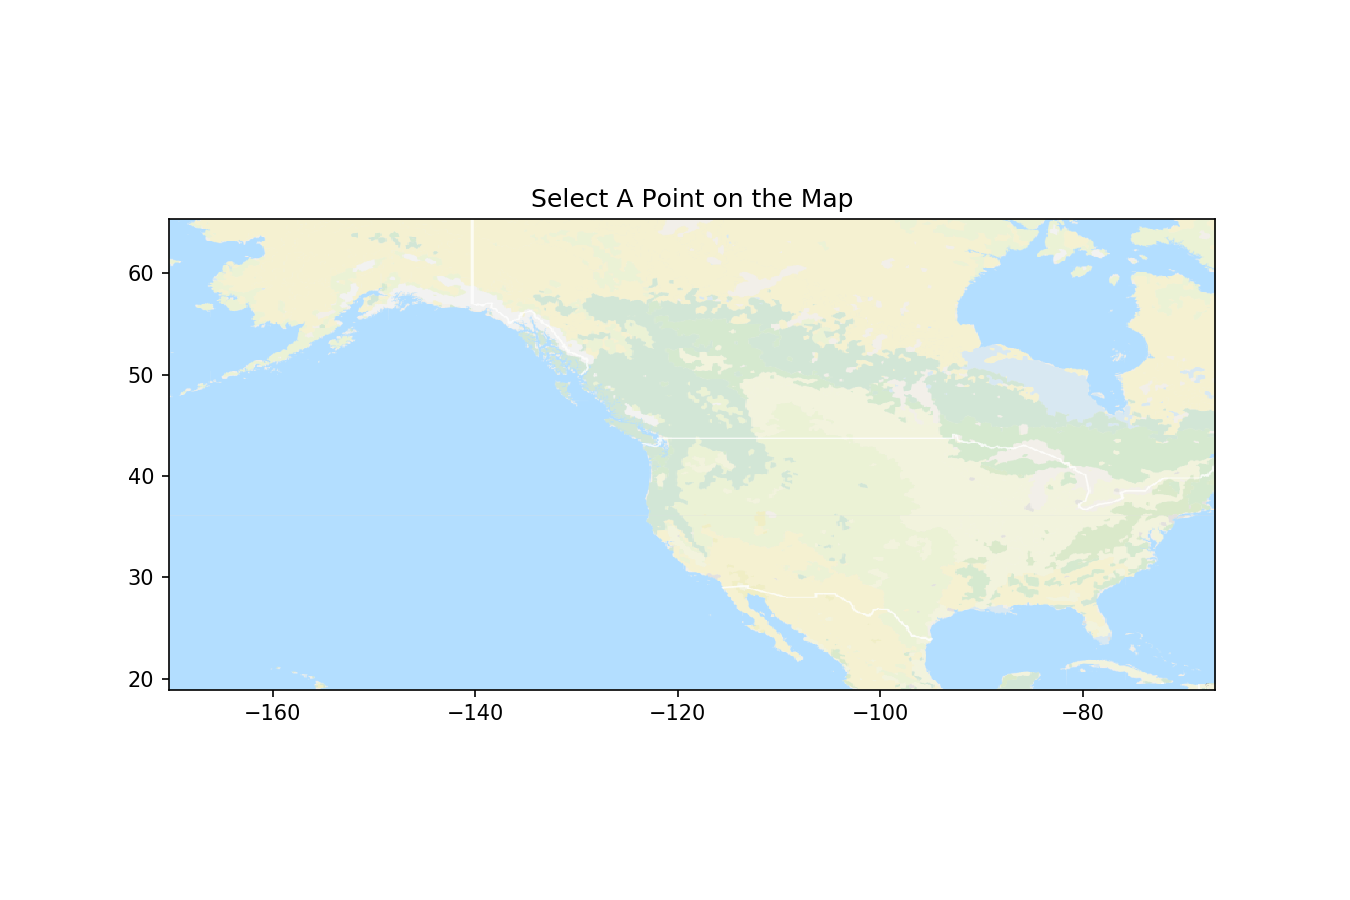

Textarea(value='', placeholder='None Selected')

Button(button_style='success', description='Enter', style=ButtonStyle())

Output()

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

the_map = plt.imread('select_map.png')

fig, ax = plt.subplots(figsize = (9,6))
ax.set_title('Select A Point on the Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(the_map, zorder=0, extent = BBox, aspect= 'equal')


#Create and display textarea widget
txt = widgets.Textarea(
    value='',
    placeholder='None Selected',
    disabled=False
)
display(txt)

# Define a callback function that will update the textarea
def onclick(event):
    
    full_input = str(event)
    split_1 = full_input.split('xydata=(')
    split_2 = split_1[1].split(') button=1')
    nums = split_2[0].split(',')
    txt.value = 'Lat: ' + nums[0] + ',\n' + 'Long: ' + nums[1]  # update textbox
    
# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)


button = widgets.Button(description="Enter", button_style='success')
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        if txt.value == '':
            print('Select point on the map')
        else:
            
            # get lat and long
            lat = txt.value.split(',\n')[0]
            lat = float(lat[4:])
            long = txt.value.split(',\n')[1]
            long = float(long[5:])
            
            # maybe have point show up on the map
#             ax.plot(long, lat)
#             ax.imshow(the_map, zorder=0, extent = BBox, aspect= 'equal')
            
            year = date.value.year
            season = (date.value.month %12 + 3)//3
            cl_in = pd.DataFrame([[year, season, lat, long]], columns=num_df_list)
            cl_in_prepared = X_pipeline.transform(cl_in)
            pred = nn.predict(cl_in_prepared)
            pred_output = LE.inverse_transform([pred.argmax()])[0]
            date_output = date.value.strftime("%m/%d/%Y")
            
            print('Most probable trash in this area on {} will be {}'.format(date_output, pred_output))
                  
button.on_click(on_button_clicked)